In [1]:
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\austinsh\AppData\Local\Temp\ipykernel_14780\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al    C4_pct_Eth    C4_pct_H2O  HydWtr_pct_Ammonia  \
count  58749.000000  58749.000000  58749.000000        58749.000000   
mean       6.156007      1.482584     21.425175            0.988184   
std        0.327066      3.562871      4.507699            0.214473   
min        0.155707      0.001000      0.057000            0.070270   
25%        6.009710      0.634452     18.838000            0.875294   
50%        6.150930      1.142670     21.444600            0.943749   
75%        6.312280      1.720800     23.344800            1.046050   
max        8.058320     77.165000     95.818000            3.744840   

         C4_pct_Hex   HydWtr_Na2O       Butanol       DI55102       DI55152  \
count  58749.000000  58749.000000  58749.000000  58749.000000  58749.000000   
mean       0.546025      0.942882     11.962564      0.943126      0.933108   
std        0.863182      4.011604     15.608899      0.054624      0.032043   
min        0.000000      0.000000      0.000000      0.800002      0.809662   
25%        0.336611      0.458320      3.842080      0.908179      0.912638   
50%        0.437783      0.673663      6.050000      0.948168      0.933281   
75%        0.541010      0.995499     12.190000      0.984087      0.953225   
max       13.392400    279.492000     99.950000      1.120200      1.039590   

            FC55552       FC55569       FC55576      FFC55553      FFC55555  \
count  58749.000000  58749.000000  58749.000000  58749.000000  58749.000000   
mean   35312.569259   6624.872902    371.426412      0.995352      0.771099   
std     5772.188678    496.756716    254.032390      0.061234      0.028924   
min     7377.560000      0.000000      0.000000      0.042564      0.000000   
25%    33749.800000   6346.930000    197.761000      0.972616      0.757565   
50%    37915.700000   6580.400000    344.749000      0.998399      0.771551   
75%    39006.200000   6837.160000    546.466000      1.020290      0.787966   
max    52000.000000  10503.000000   1461.990000      1.475490      0.998409   

            LC55557       LC90366       LC90368       TC55552  
count  58749.000000  58749.000000  58749.000000  58749.000000  
mean      69.522364     45.628719     36.522146    168.174319  
std        3.155705     28.888482     20.326790     16.127633  
min        0.000000      0.000000      0.006367     98.687500  
25%       67.030300     20.164500     19.641900    155.242000  
50%       70.119300     46.435200     41.280200    172.427000  
75%       71.861100     76.866500     52.052500    180.694000  
max      100.000000     87.901600     81.210800    203.179000

In [5]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 19


In [6]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [7]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
425_pct_Al                   float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
HydWtr_pct_Ammonia           float64
C4_pct_Hex                   float64
HydWtr_Na2O                  float64
Butanol                      float64
DI55102                      float64
DI55152                      float64
FC55552                      float64
FC55569                      float64
FC55576                      float64
FFC55553                     float64
FFC55555                     float64
LC55557                      float64
LC90366                      float64
LC90368                      float64
TC55552                      float64
dtype: object


Skipping datetime column: Date


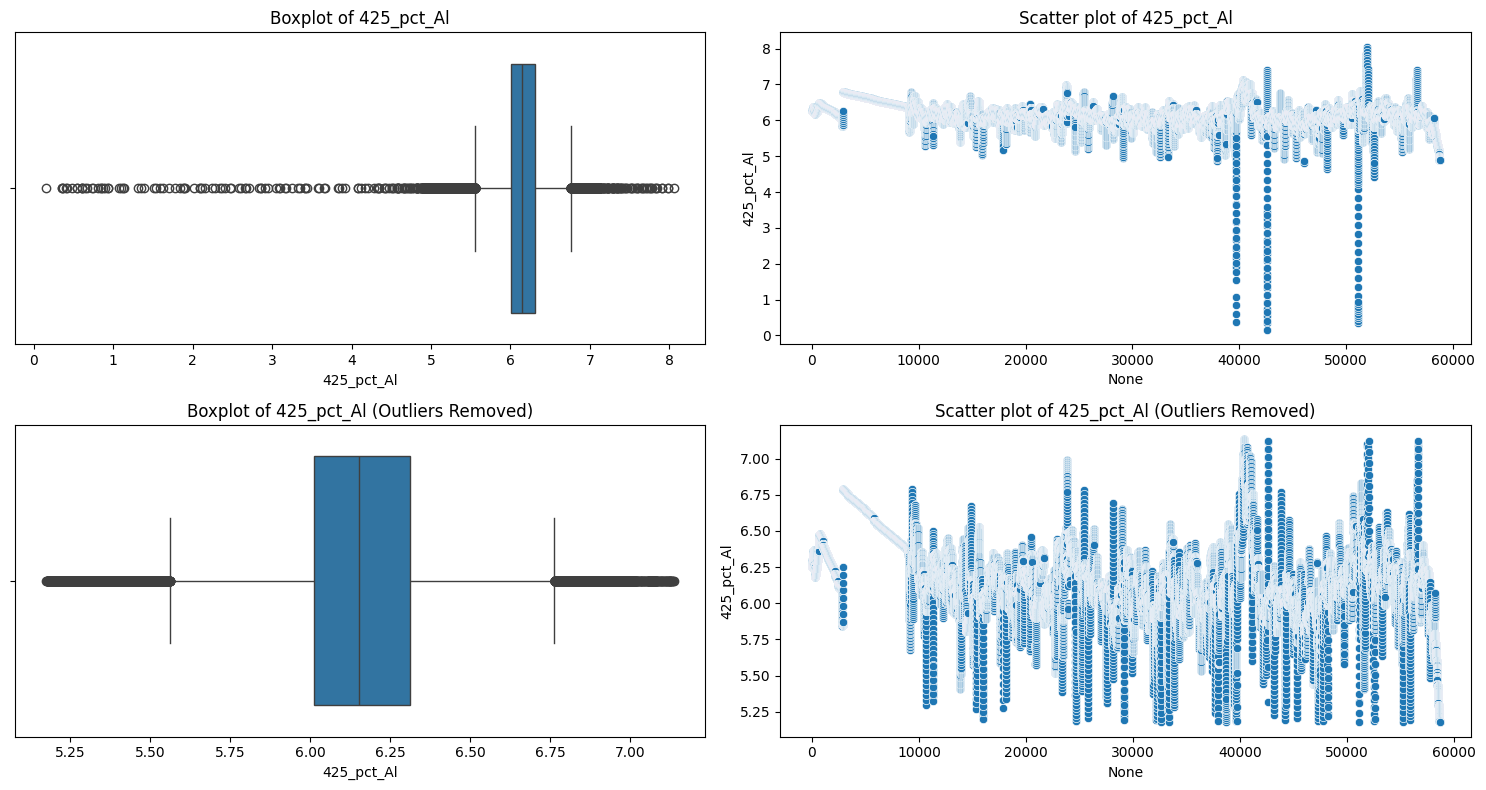

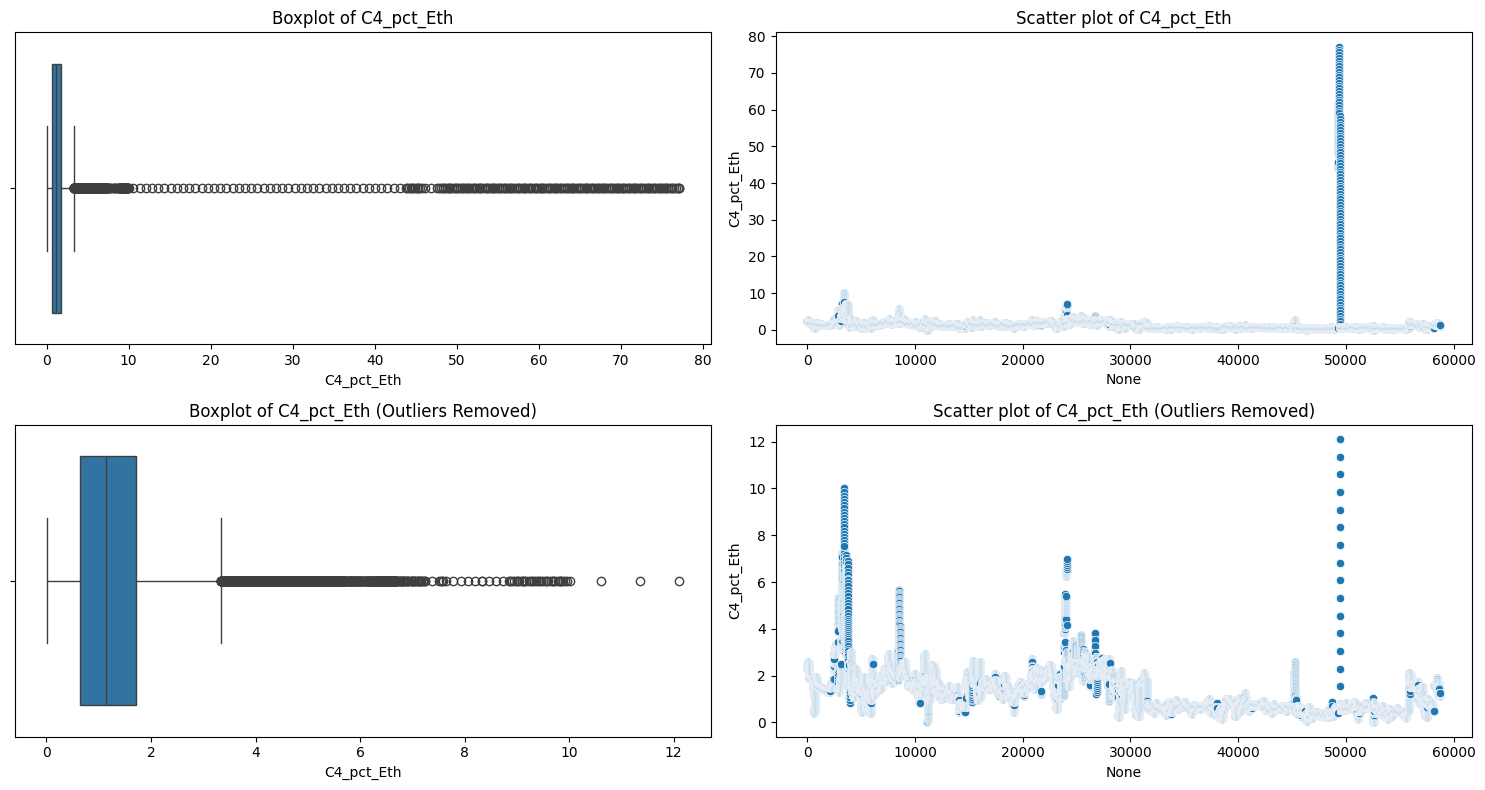

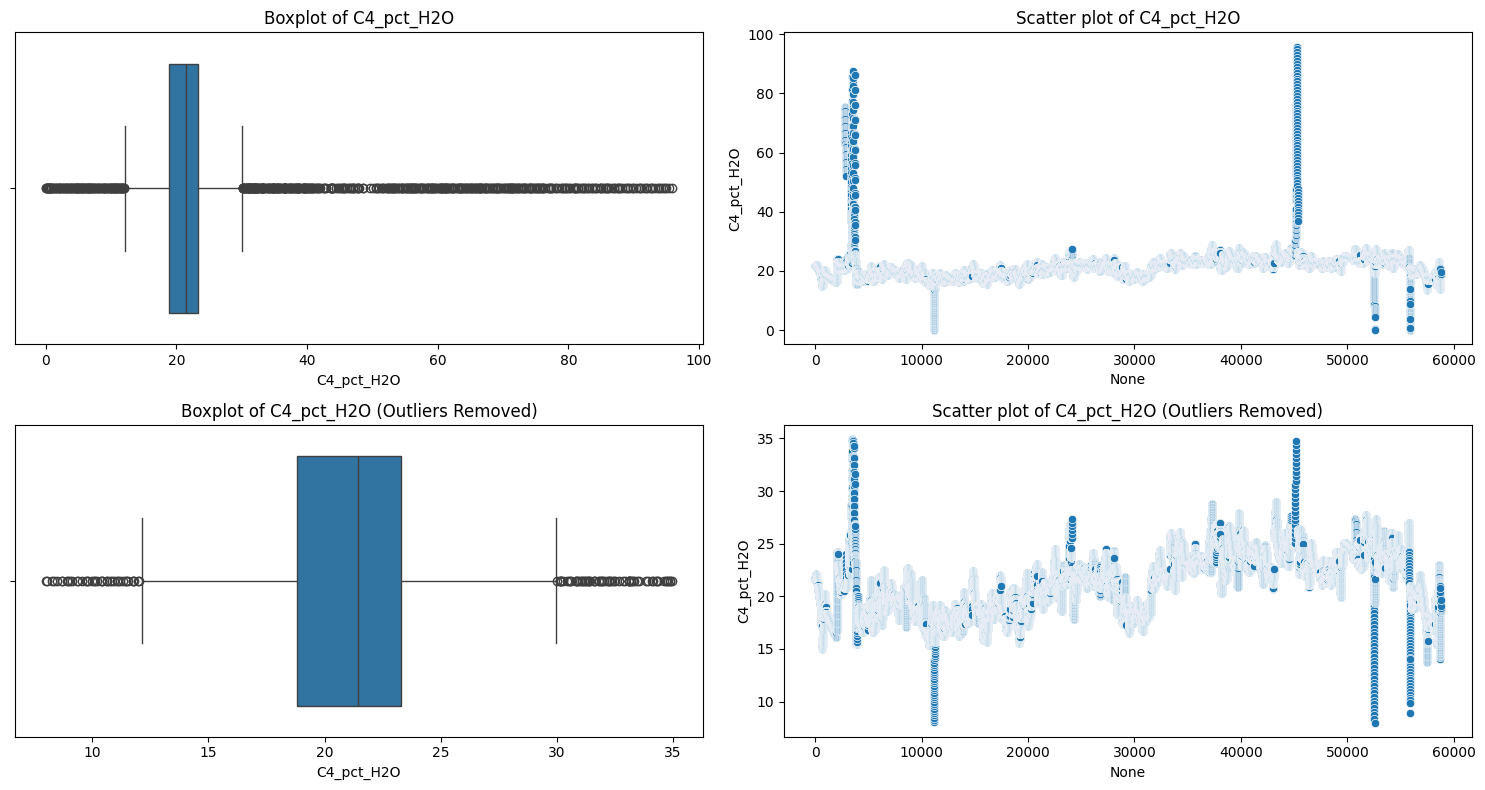

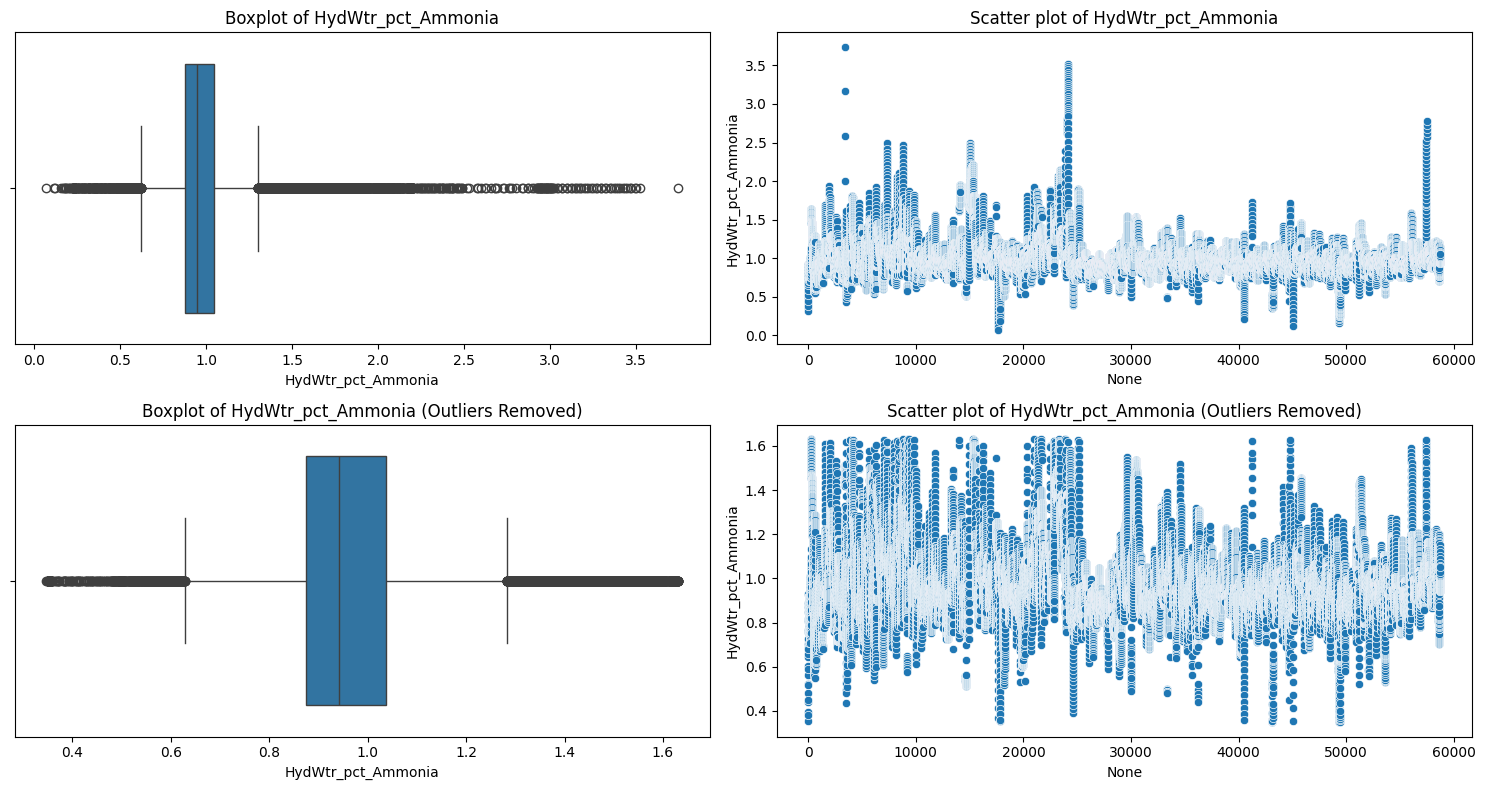

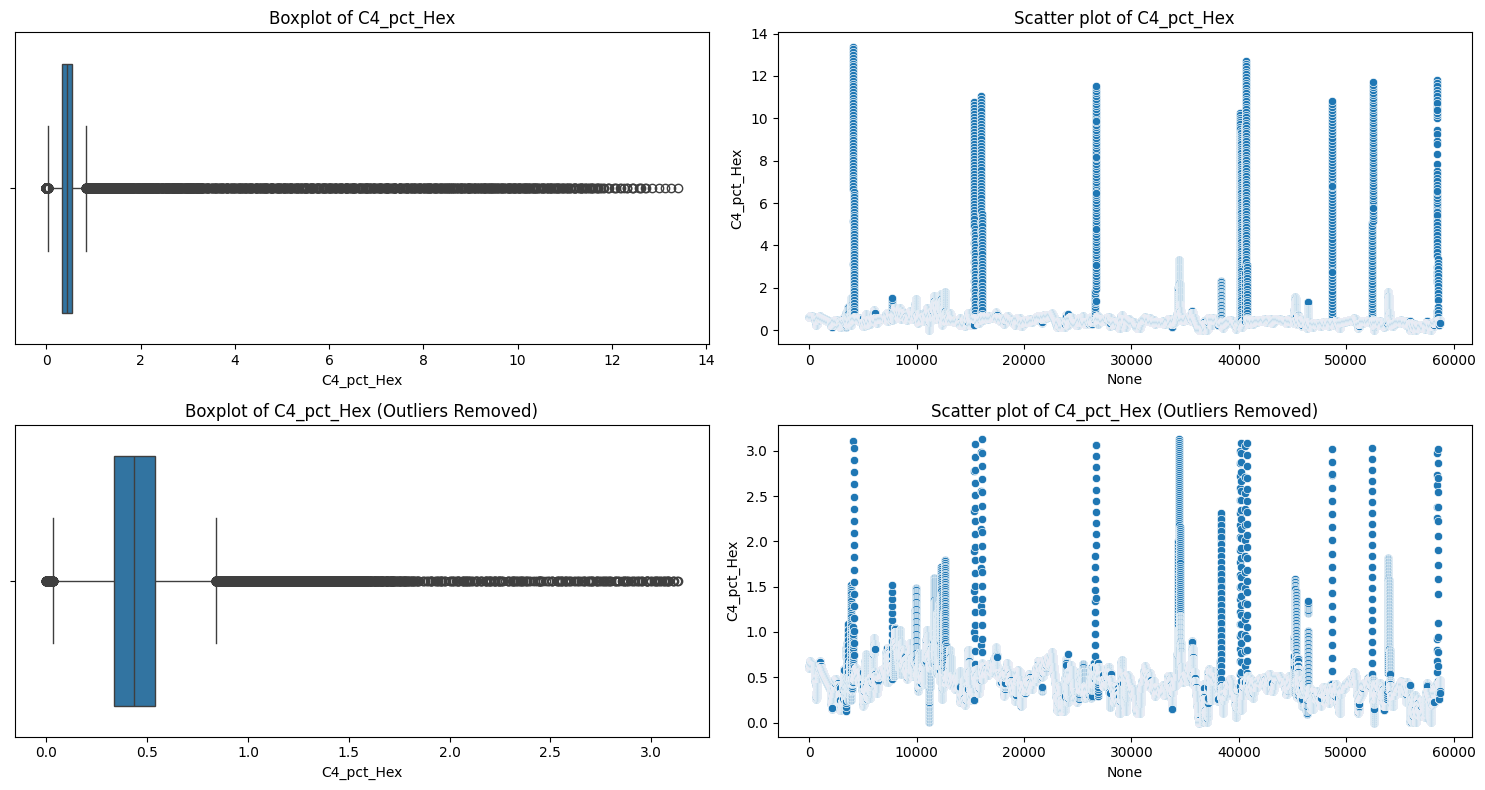

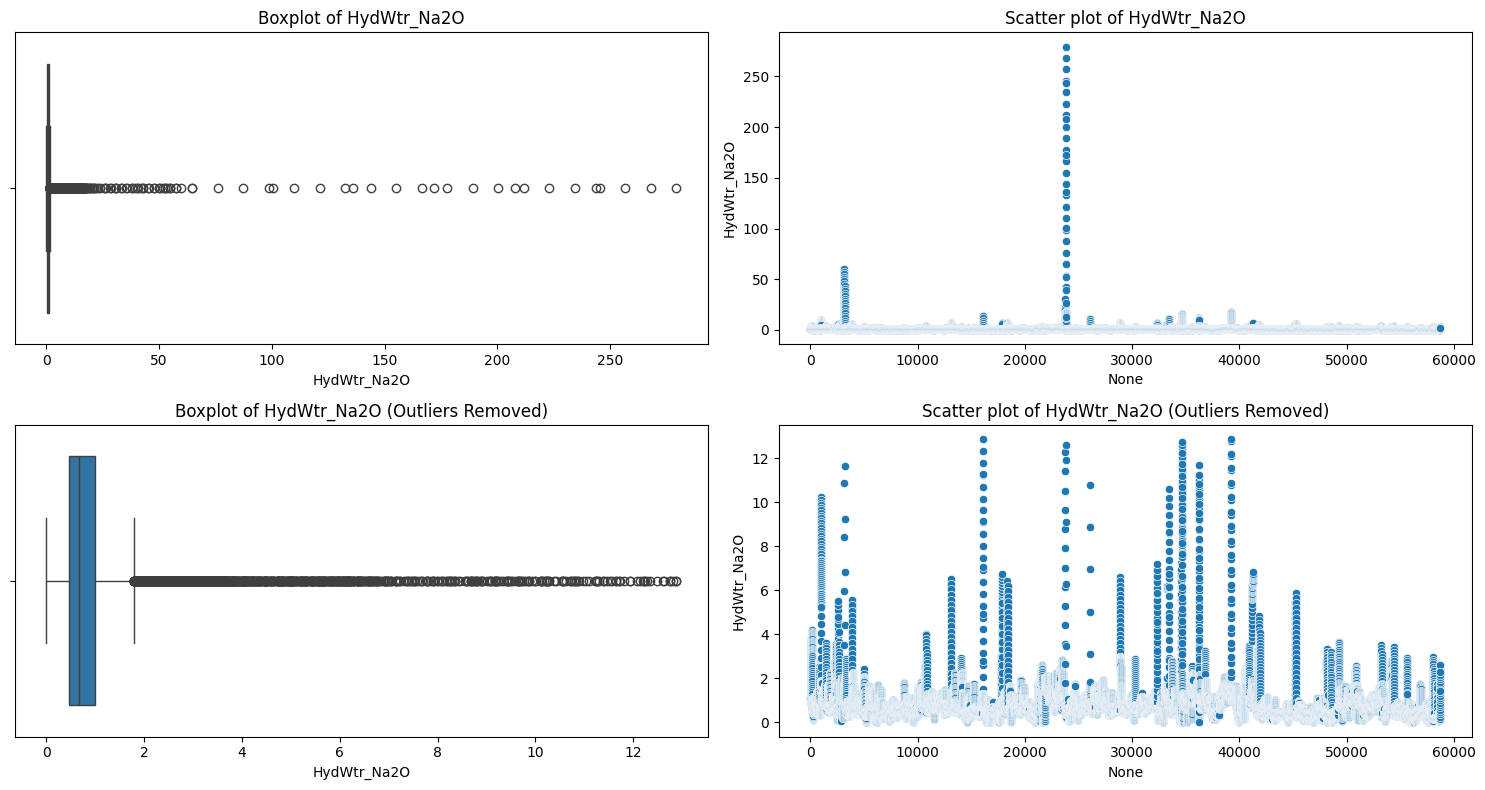

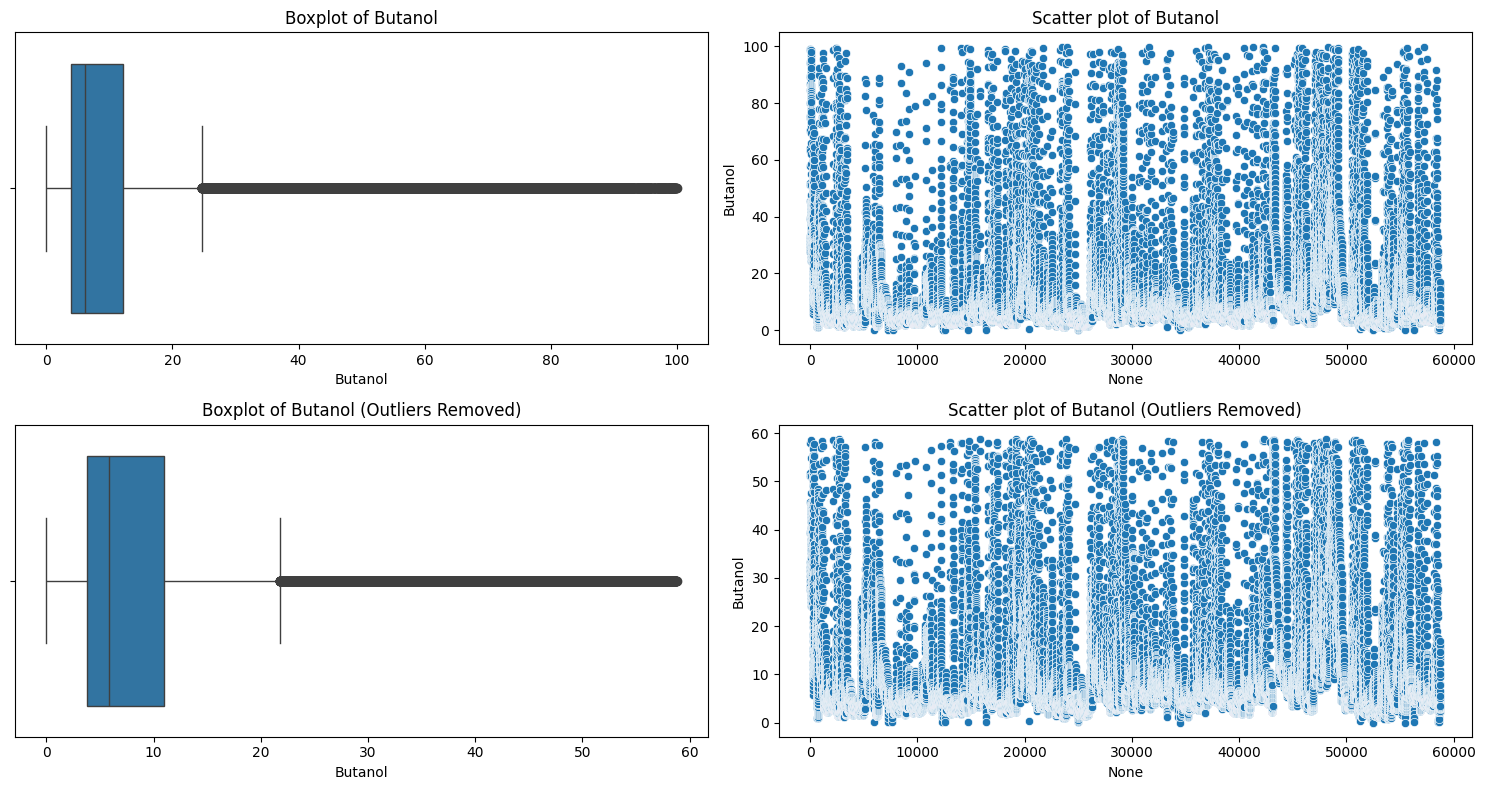

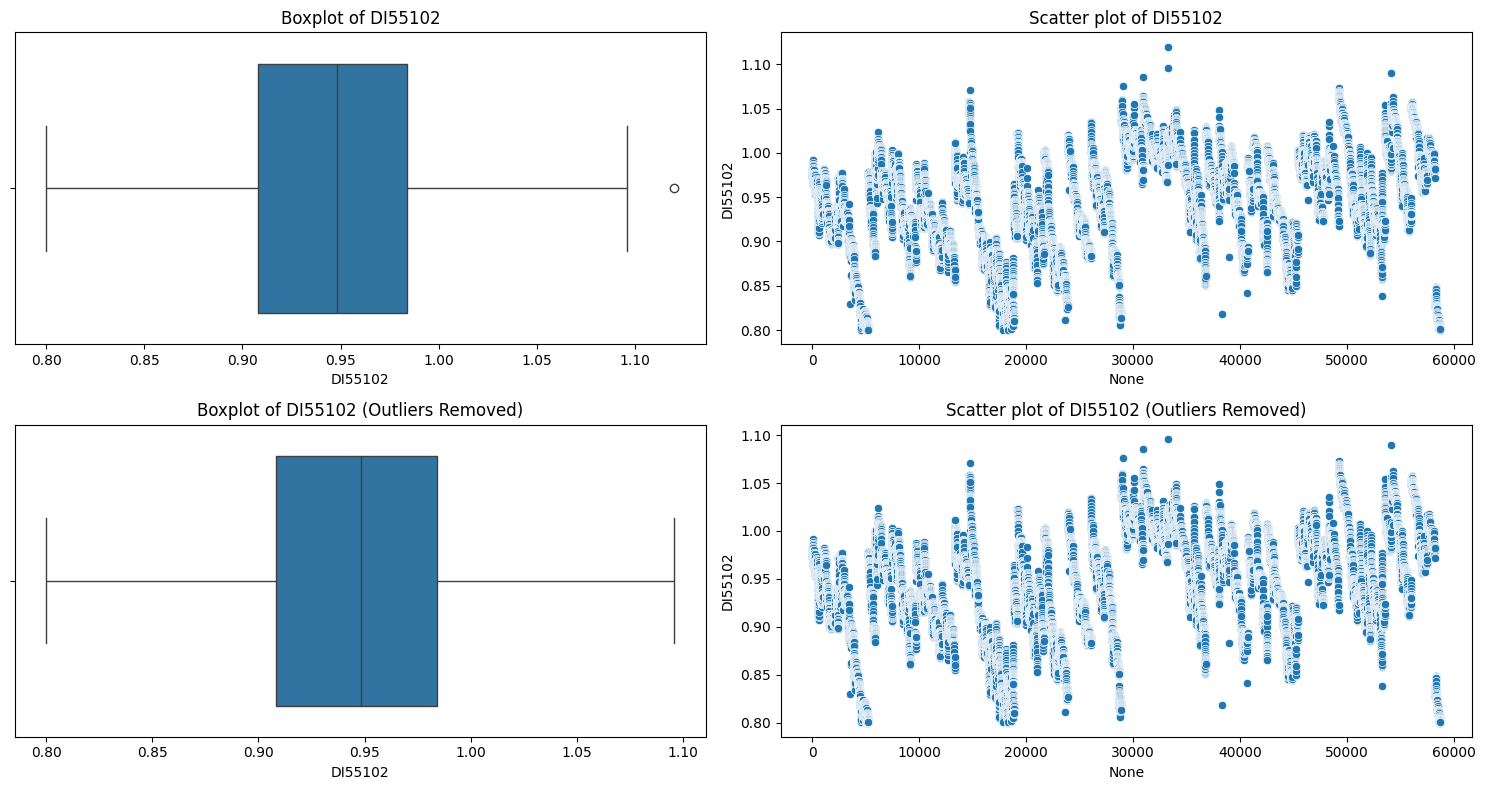

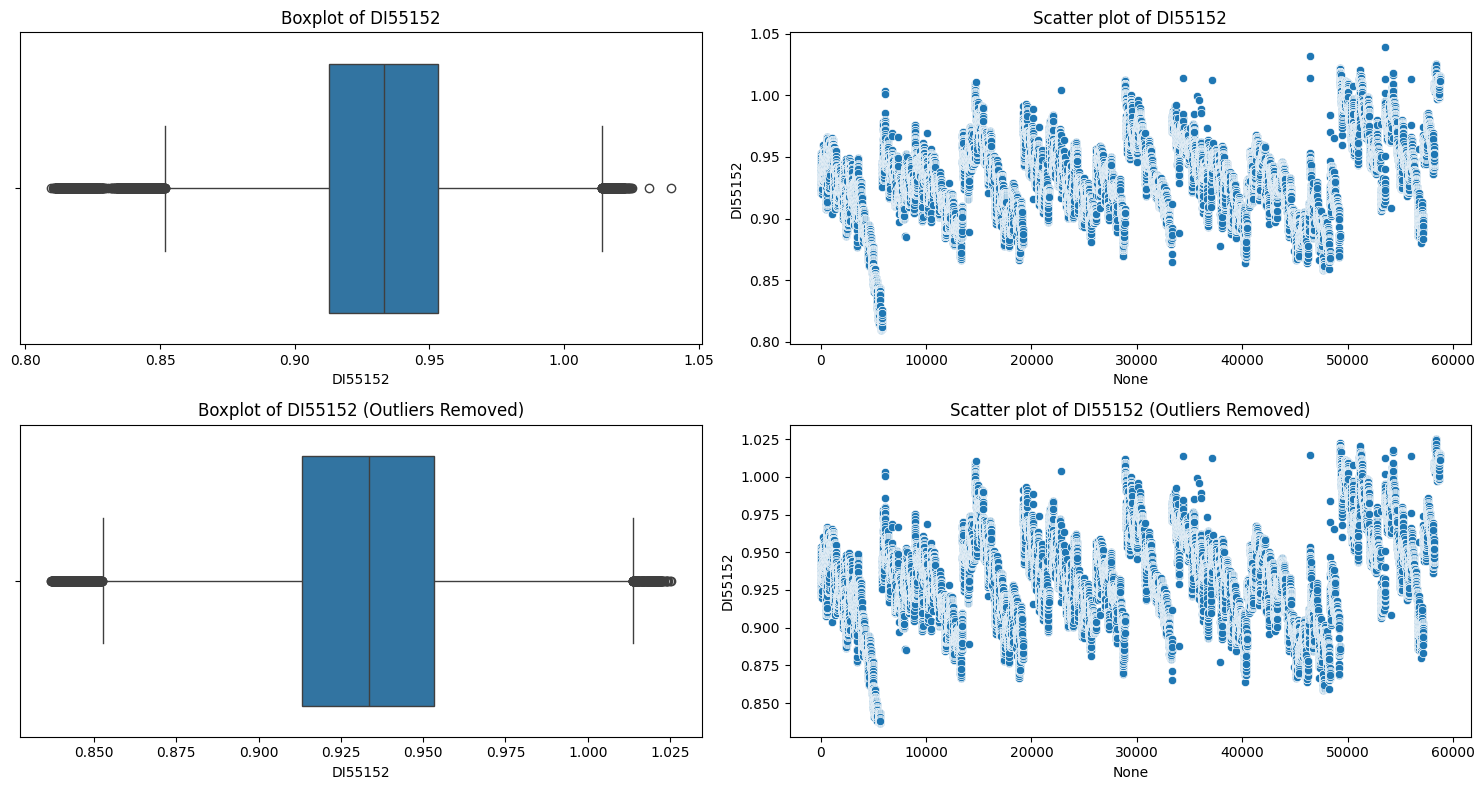

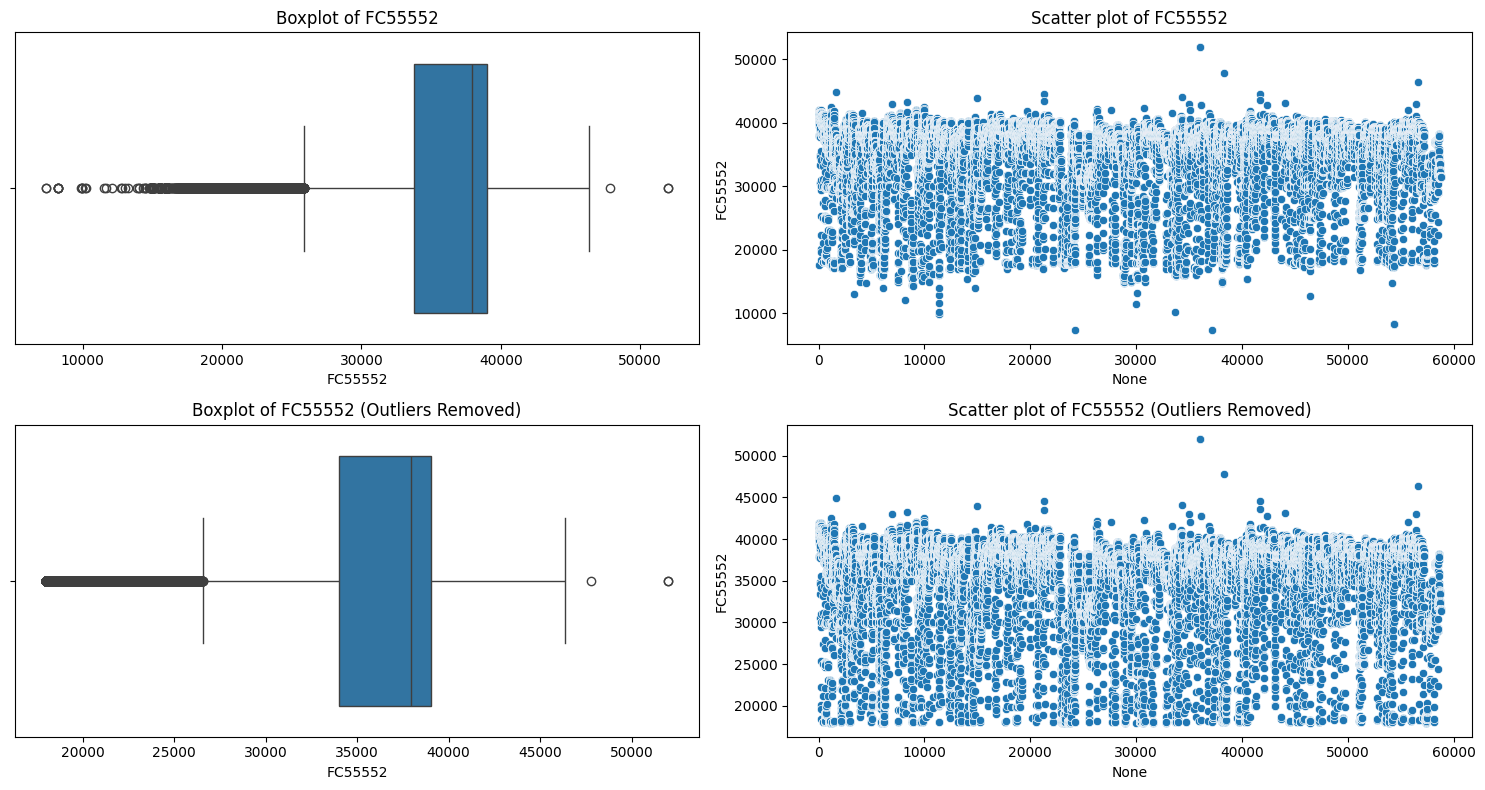

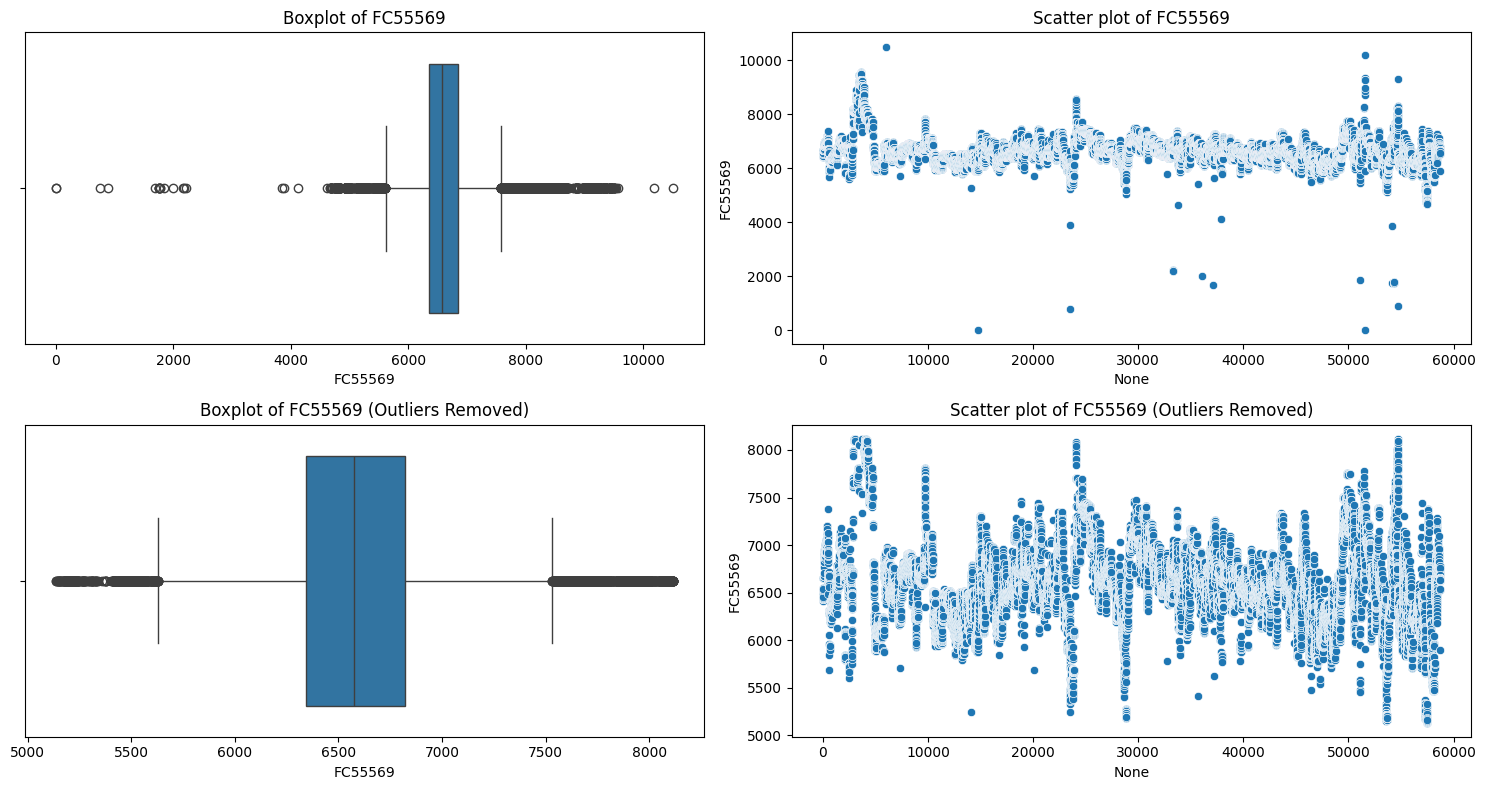

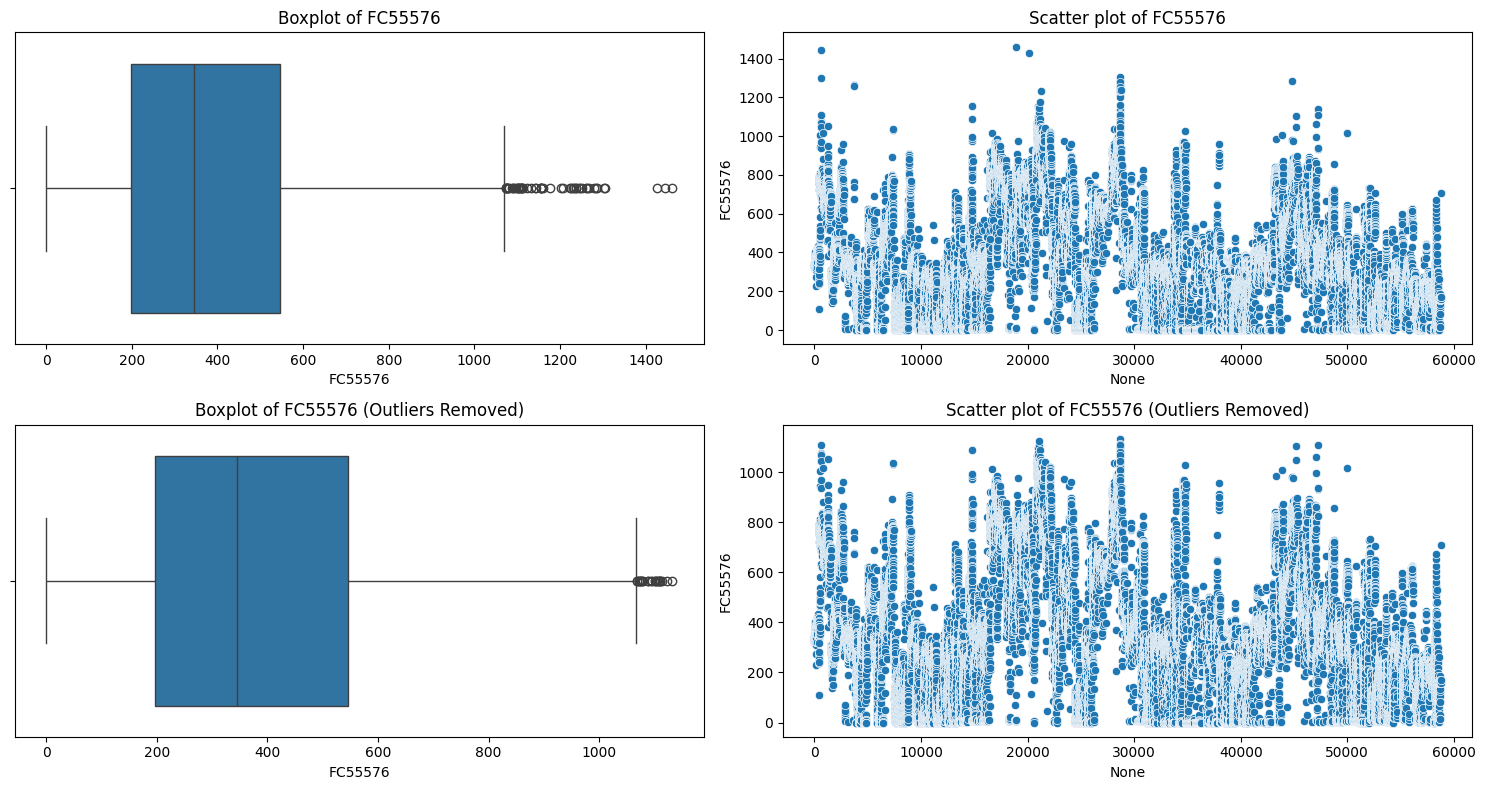

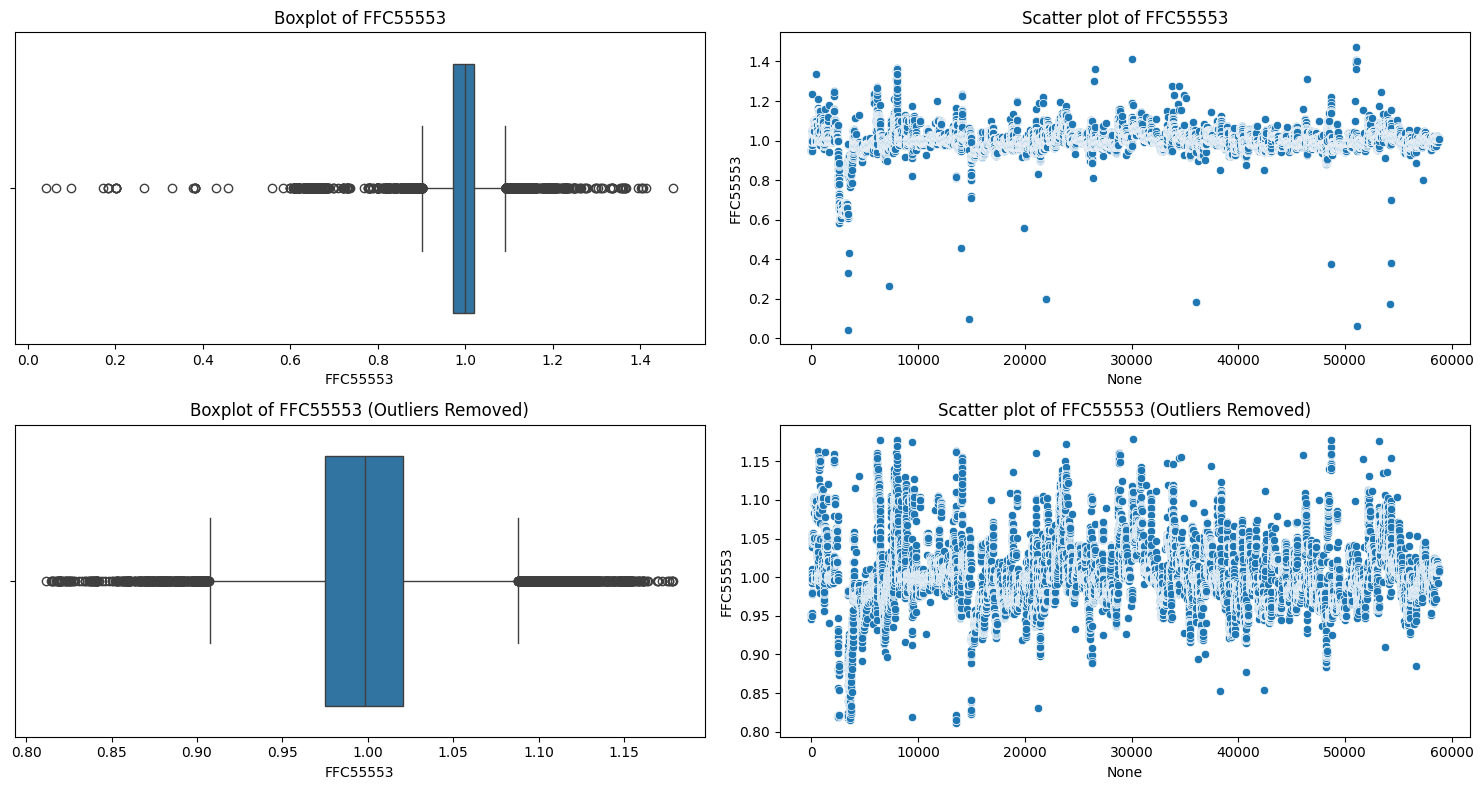

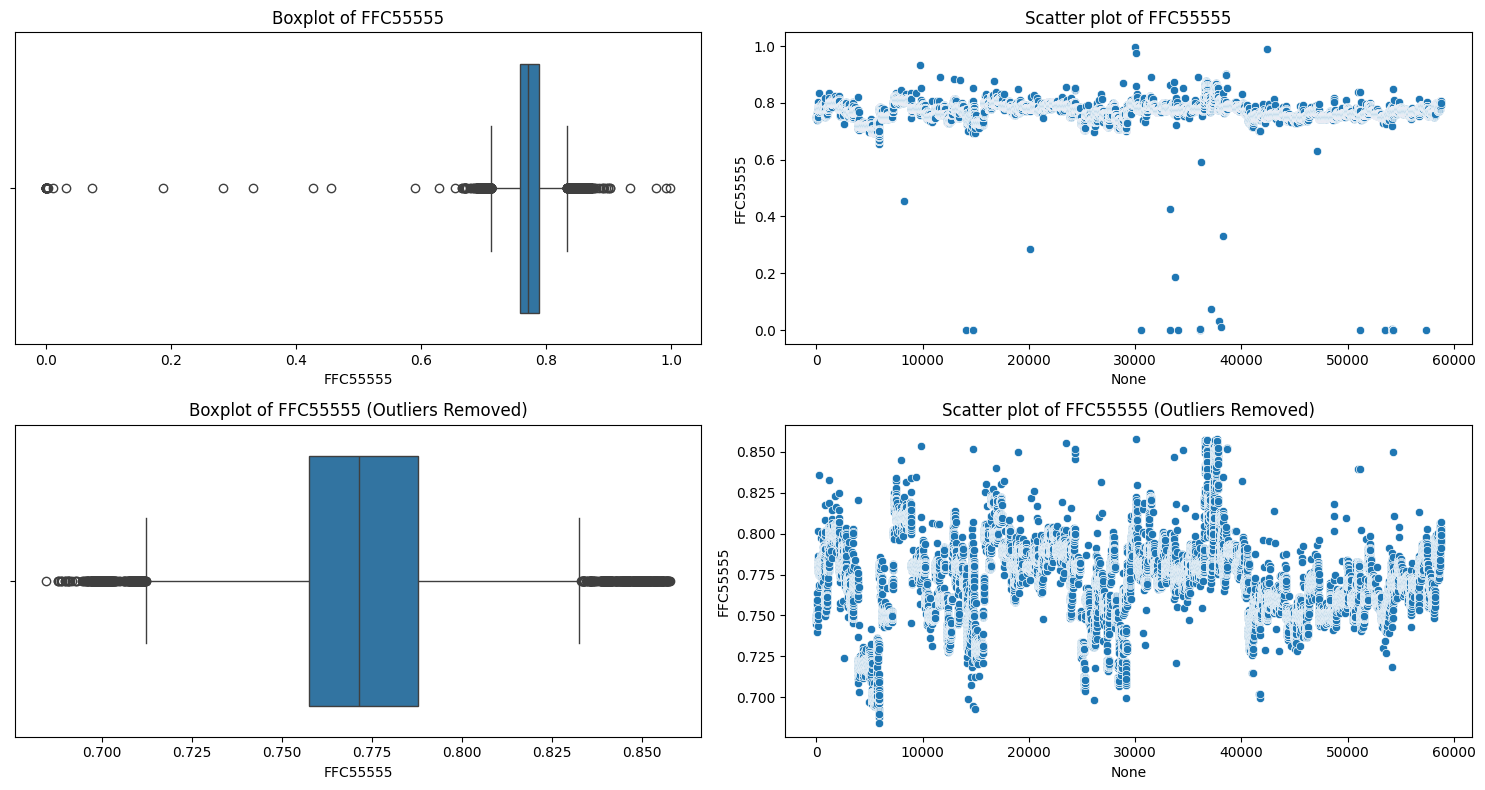

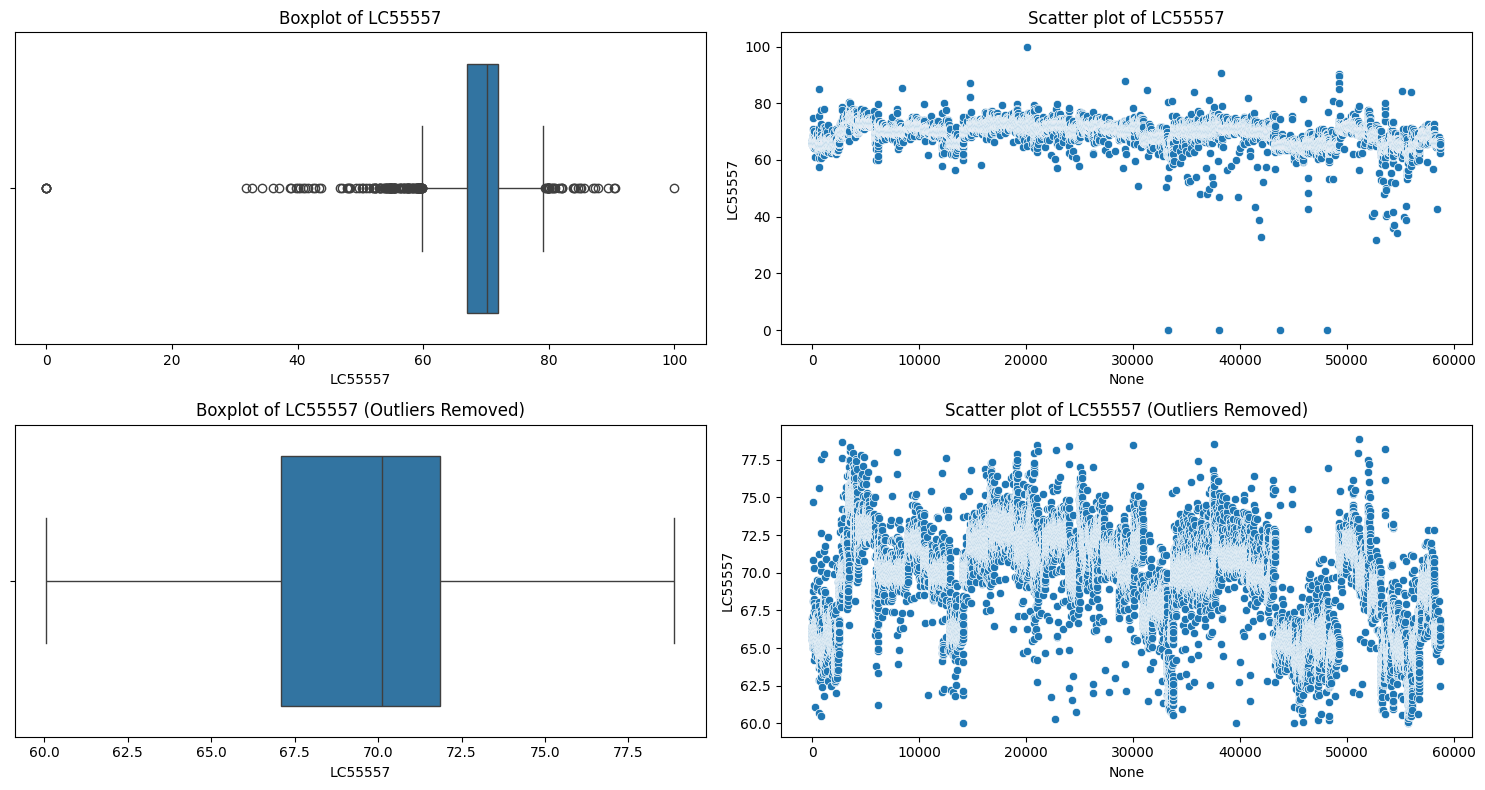

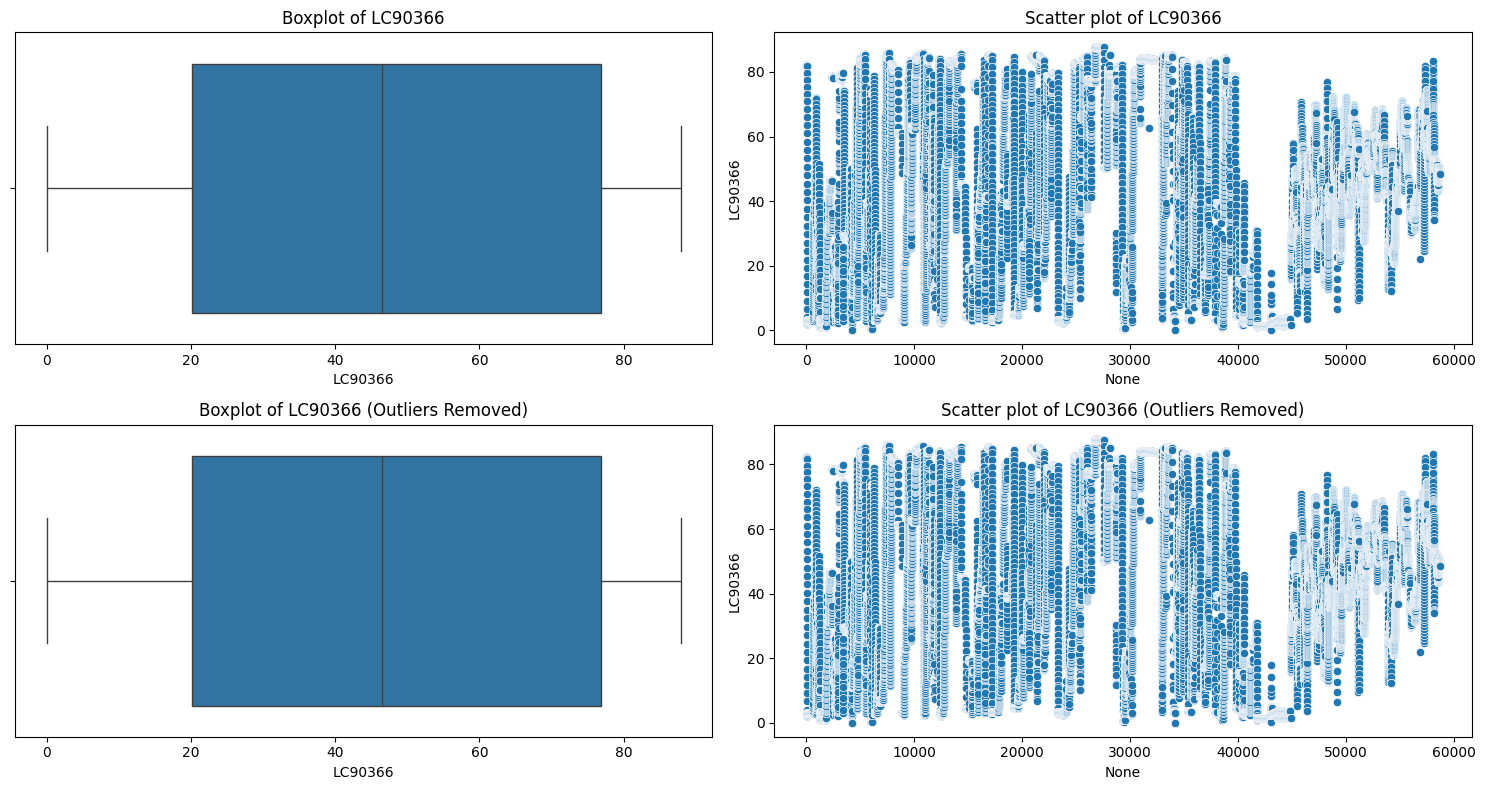

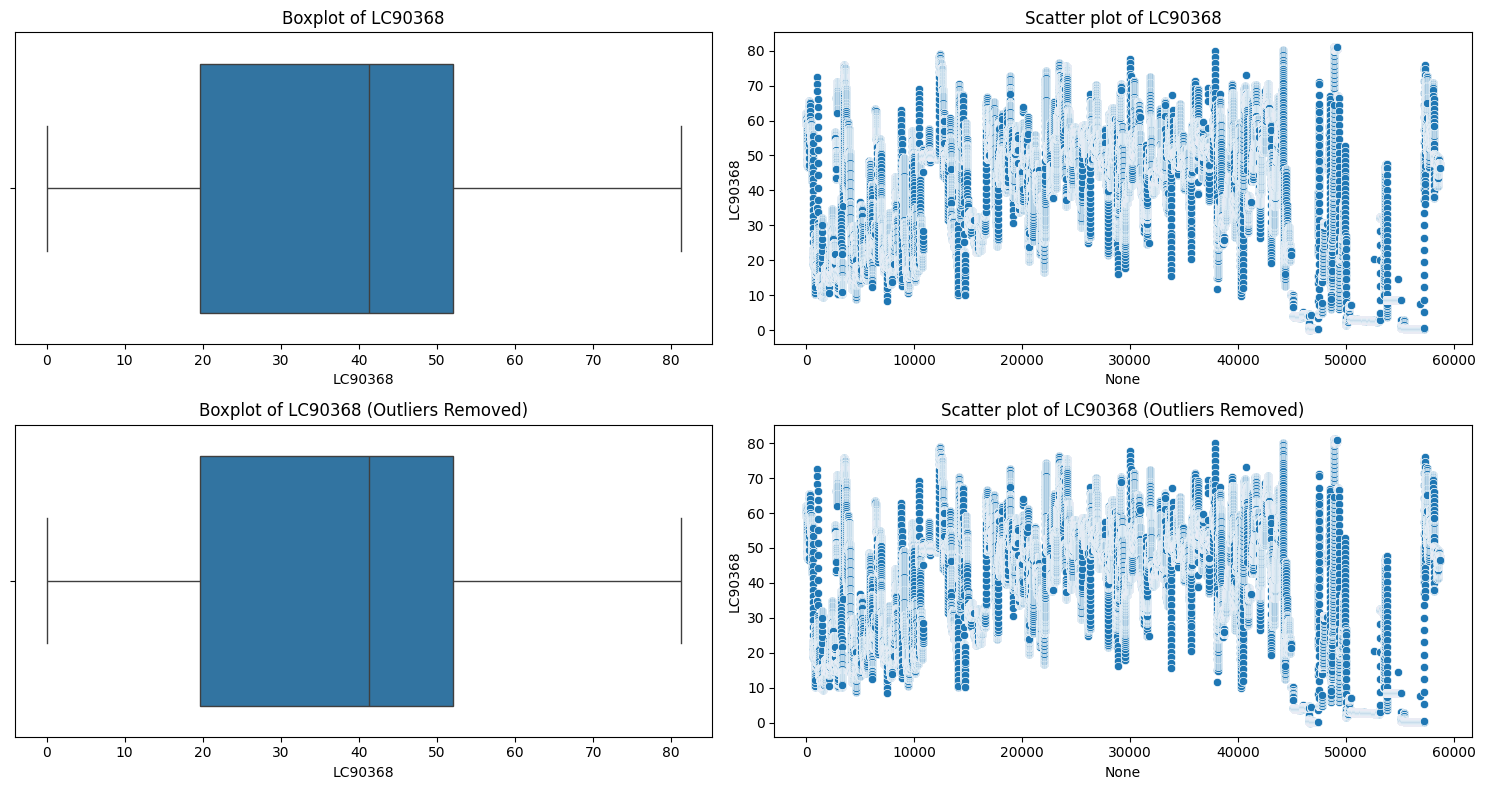

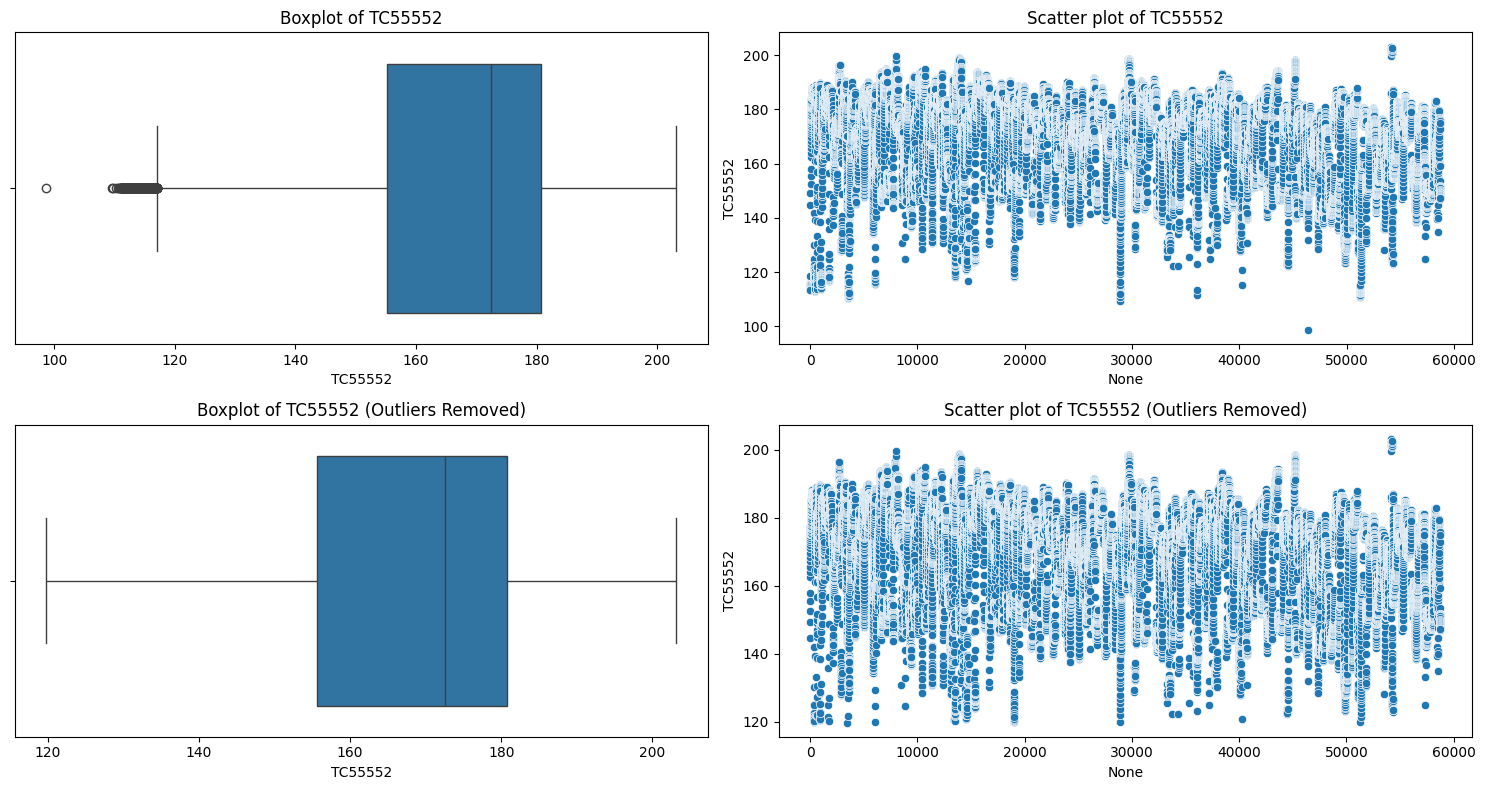

In [8]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [9]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [10]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [11]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       58749          58302        447        0.760864
1           C4_pct_Eth       58749          58525        224        0.381283
2           C4_pct_H2O       58749          58293        456        0.776183
3   HydWtr_pct_Ammonia       58749          57623       1126        1.916628
4           C4_pct_Hex       58749          57985        764        1.300448
5          HydWtr_Na2O       58749          58625        124        0.211067
6              Butanol       58749          56849       1900        3.234098
7              DI55102       58749          58748          1        0.001702
8              DI55152       58749          58362        387        0.658735
9              FC55552       58749          57699       1050        1.787264
10             FC55569       58749          57591       1158        1.971097
11             FC55576       58749          58719         30        0.051065

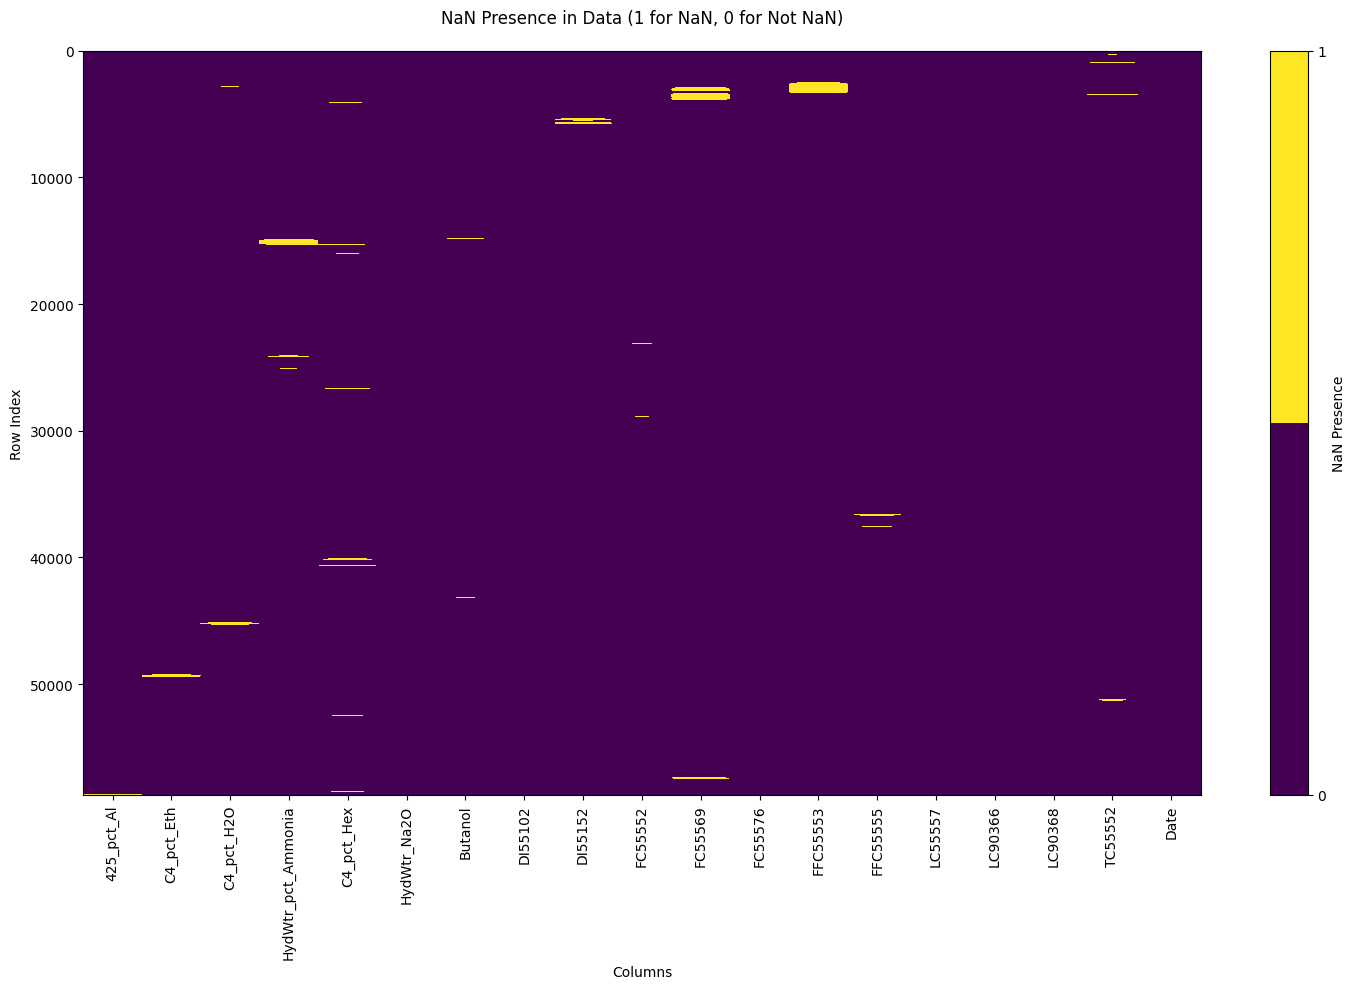

In [12]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [13]:
df_outlierHandling = df_outlierHandling.dropna().copy()



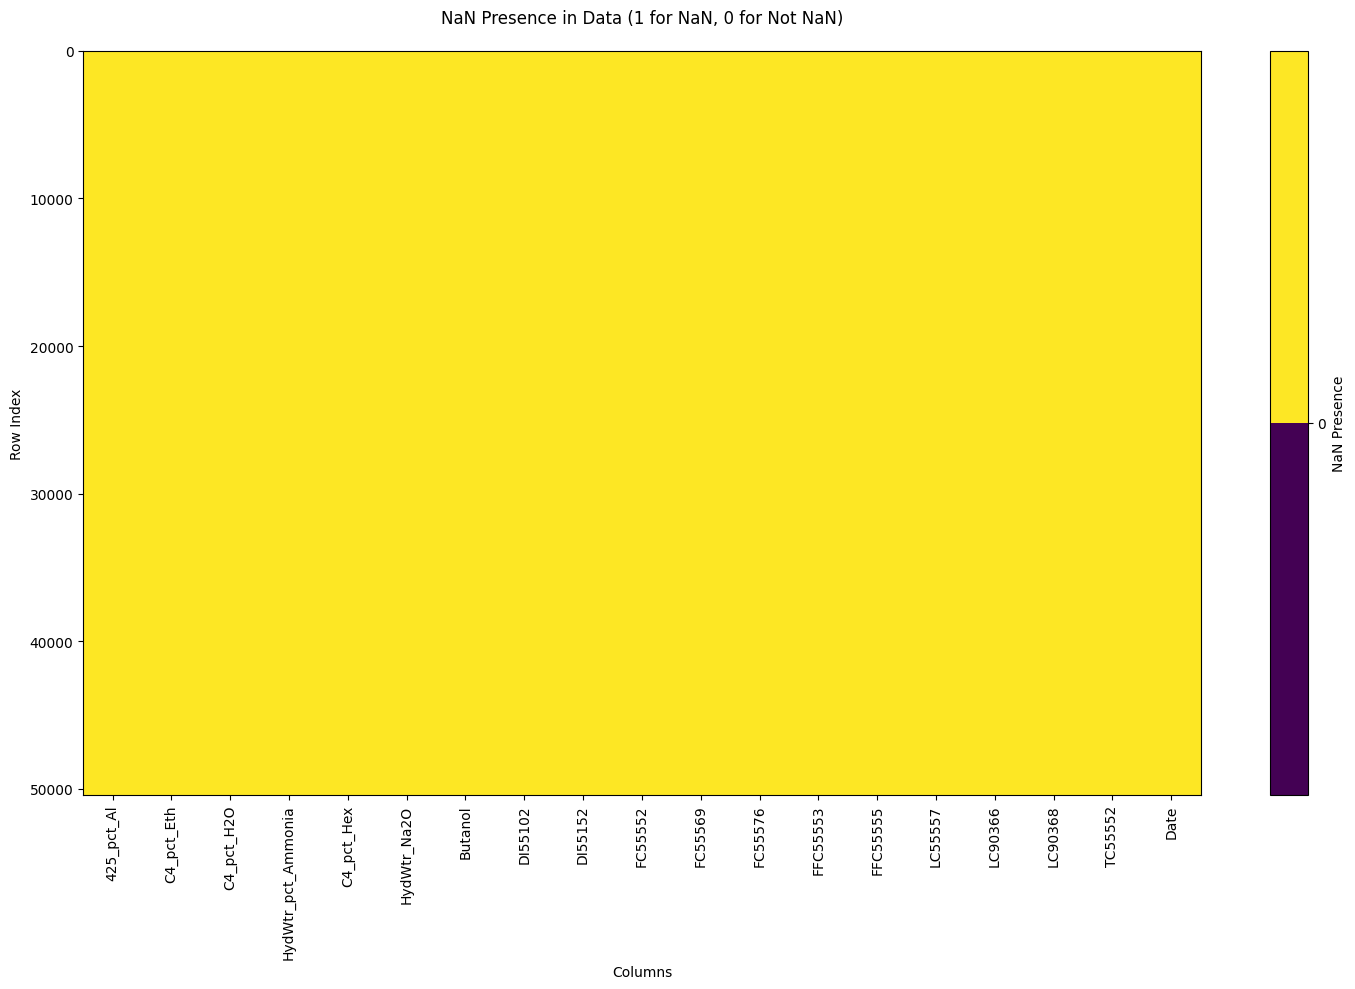

In [14]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [15]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       50412          50412          0             0.0
1           C4_pct_Eth       50412          50412          0             0.0
2           C4_pct_H2O       50412          50412          0             0.0
3   HydWtr_pct_Ammonia       50412          50412          0             0.0
4           C4_pct_Hex       50412          50412          0             0.0
5          HydWtr_Na2O       50412          50412          0             0.0
6              Butanol       50412          50412          0             0.0
7              DI55102       50412          50412          0             0.0
8              DI55152       50412          50412          0             0.0
9              FC55552       50412          50412          0             0.0
10             FC55569       50412          50412          0             0.0
11             FC55576       50412          50412          0             0.0

In [16]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 19


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [17]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [18]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'DI55102', 'DI55152', 'FC55552',
       'FC55569', 'FC55576', 'FFC55553', 'FFC55555', 'LC55557', 'LC90366',
       'LC90368', 'TC55552', 'Date'],
      dtype='object')

In [19]:
saoSelect = ['Date', '425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 
             'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O']

fb554Select = ['Date', 'Butanol']

unitSelect = ['Date', 'DI55102', 'DI55152', 'FC55552',
       'FC55569', 'FC55576', 'FFC55553', 'FFC55555', 'LC55557', 'LC90366',
       'LC90368', 'TC55552']





df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - ['Date']*2:", num_columns_total-2)


Number of features: 21
Number of features - ['Date']*2: 19


In [20]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [21]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\cont_unitData_clean.csv', index=False)

In [22]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-06 22:12:54.475730
